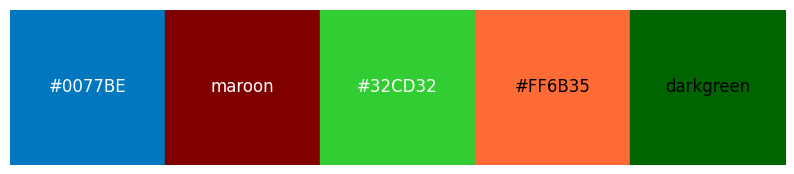

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import time
import datetime
import matplotlib.dates as mdates
from matplotlib.patches import Patch
from matplotlib.animation import FuncAnimation

COLORS = ['#0077BE', 'maroon', '#32CD32', '#FF6B35', 'darkgreen']

plt.figure(figsize=(10, 2))

for i, color in enumerate(COLORS):
    plt.fill_between([i, i+1], 0, 1, color=color)
    plt.text(i+0.5, 0.5, color, ha='center', va='center', fontsize=12, color='white' if i<3 else 'black')

plt.xlim(0, len(COLORS))
plt.ylim(0, 1)
plt.axis('off')  # Don't show axis
plt.show()

In [2]:
df = pd.read_csv("processed_data.csv", index_col= 0, parse_dates= True)
df["Costs"] = df.Consumption * df.Preis / 1000
df["Predicted Costs"] = df.Pred * df.Preis / 1000

df.isna().sum()

Production            0
Purchased             0
FeedIn                0
Consumption           0
SelfConsumption       0
Pred               7008
data                  0
Preis                 1
Costs                 1
Predicted Costs    7009
dtype: int64

In [3]:
before = df.loc[df.Pred.isna()]
after = df.loc[df.Pred.notna()]

cut = before.index[-1]

together = pd.concat(
[    before.iloc[-10:] ,
    after.iloc[:10]]
)

together = together.rename(columns={"Pred":"Predicted Consumption"})

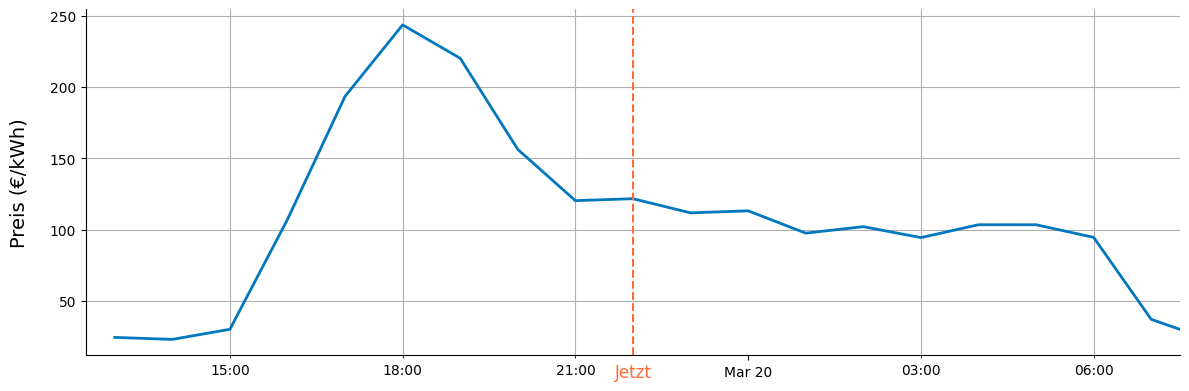

In [4]:
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)

# Daten plotten mit einem schönen Blauton
ax.plot(together.index, together.Preis, color=COLORS[0], lw=2)

# Y-Achsen-Beschriftung
ax.set_ylabel("Preis (€/kWh)", fontsize=14, labelpad=15)

# X-Achse mit besserem Format einrichten und Labels drehen für bessere Klarheit
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Eine gepunktete vertikale Linie bei 'jetzt' hinzufügen
ax.axvline(x=now, linestyle='--', color=COLORS[3], lw=1.5)
ax.text(now, 0, 'Jetzt', color=COLORS[3], ha='center', va='center', rotation=0, fontsize=12)

# Den Plot um 'jetzt' zentrieren
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])

# Titel

# Spines (der Kasten um den Plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("imgs/Preise.svg")
plt.show()


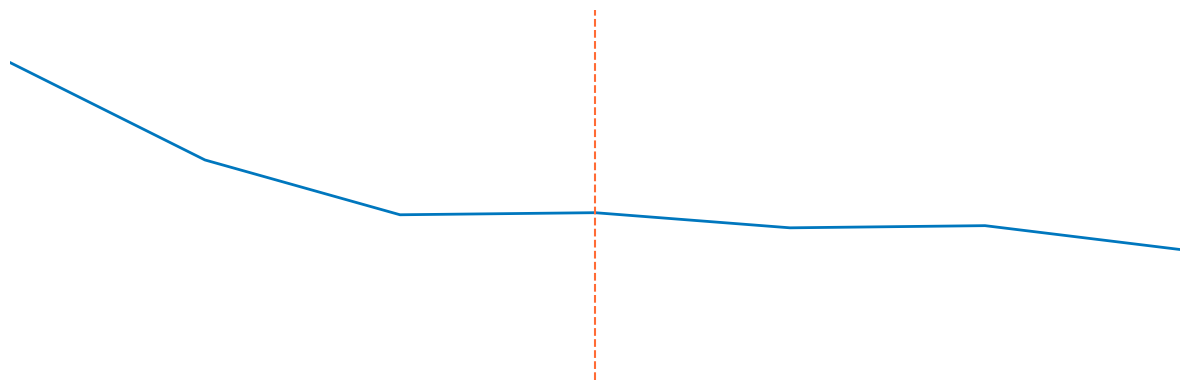

In [5]:
fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)

# Daten plotten mit einem schönen Blauton
ax.plot(together.index, together.Preis, color=COLORS[0], lw=2)

# Y-Achsen-Beschriftung

# X-Achse mit besserem Format einrichten und Labels drehen für bessere Klarheit
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=0)

# Eine gepunktete vertikale Linie bei 'jetzt' hinzufügen
ax.axvline(x=now, linestyle='--', color=COLORS[3], lw=1.5)

# Zoom 3 hours before and 3 hours after 'now'
three_hours = datetime.timedelta(hours=3)
ax.set_xlim([now - three_hours, now + three_hours])

# Spines (der Kasten um den Plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticks([],[], s= 0)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.tight_layout()
plt.savefig("imgs/Preise_zoom.svg")
plt.show()


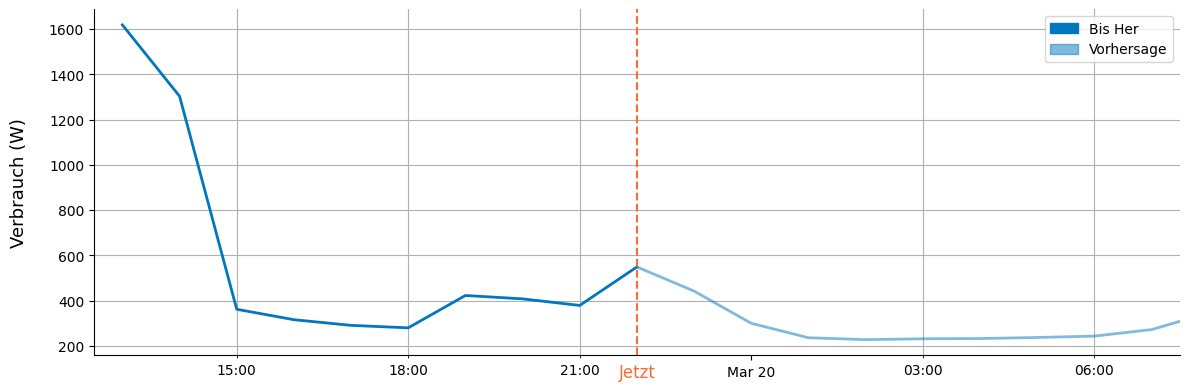

In [6]:
fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)


# Plotting the data with a beautiful shade of blue
# Plotting the actual consumption before 'now' with a solid line
ax.plot(together.loc[:now].index, together.loc[:now].Consumption, color=COLORS[0], lw=2, label='Consumption')

diff = together.copy()
last = together.loc[:now].index[-1]
together.loc[last, 'Predicted Consumption'] = together.loc[last, "Consumption"]

minus_last_hour = now - datetime.timedelta(hours= 1)

# Plotting the predicted consumption after 'now' with a dashed line
ax.plot(together.loc[minus_last_hour:].index, together.loc[minus_last_hour:]['Predicted Consumption'], 
        color=COLORS[0], 
        lw=2, 
        label='Pred',
        alpha = 0.5)


# Y-axis label
ax.set_ylabel("Verbrauch (W)", fontsize=13, labelpad=15)

# Setting up the x-axis with a better formatting and rotating labels for clarity
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Add a dotted vertical line at 'now'
ax.axvline(x=now, linestyle='--', color=COLORS[3], lw=1.5)
ax.text(now, -0.048, 'Jetzt', color=COLORS[3], ha='center', va='center', rotation=0, fontsize=12, transform=ax.get_xaxis_transform())


# Centering the plot around now
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])

legend_elements = [Patch(facecolor=COLORS[0], edgecolor=COLORS[0], label='Bis Her'),
                   Patch(facecolor=COLORS[0], edgecolor=COLORS[0], alpha=0.5, label='Vorhersage')]
ax.legend(handles=legend_elements, loc='upper right',)

# Spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig("imgs/Consumption.svg", bbox_inches = "tight")
plt.show()

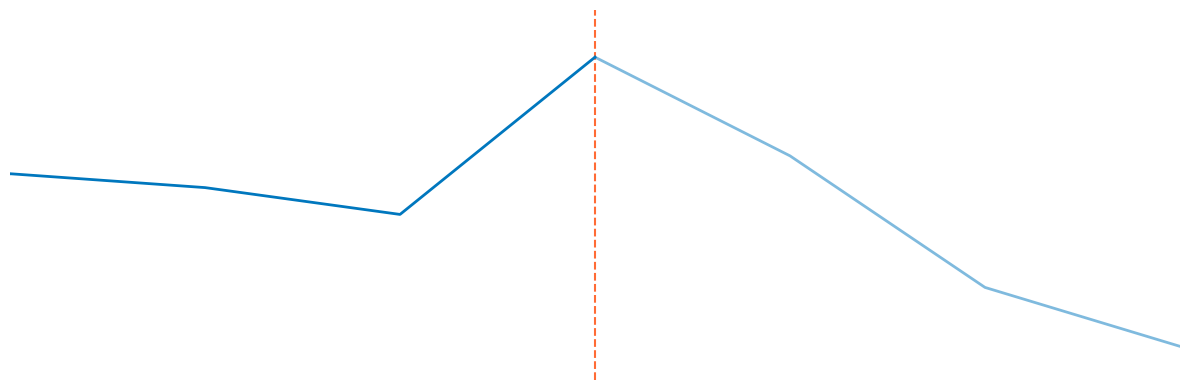

In [7]:
fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)

# Plotting the actual consumption before 'now' with a solid line

# Y-axis label

# Setting up the x-axis with a better formatting
ax.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Add a dotted vertical line at 'now'
ax.axvline(x=now, linestyle='--', color=COLORS[3], lw=1.5)

# Zoom 3 hours before and 3 hours after 'now'
three_hours = datetime.timedelta(hours=3)
ax.set_xlim([now - three_hours, now + three_hours])



# Spines (the box around the plot) and axis visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax.plot(together.loc[:now].index, together.loc[:now].Consumption, color=COLORS[0], lw=2, label='Bis Her')

diff = together.copy()
last = together.loc[:now].index[-1]
together.loc[last, 'Predicted Consumption'] = together.loc[last, "Consumption"]

minus_last_hour = now - datetime.timedelta(hours=1)

# Plotting the predicted consumption after 'now' with a dashed line
ax.plot(together.loc[minus_last_hour:].index, together.loc[minus_last_hour:]['Predicted Consumption'],
        color=COLORS[0],
        lw=2,
        label='Vorhersage',
        alpha=0.5)
ax.set_ylim(200,600)
plt.tight_layout()
plt.savefig("imgs/Consumption_zoom.svg", bbox_inches="tight")
plt.show()


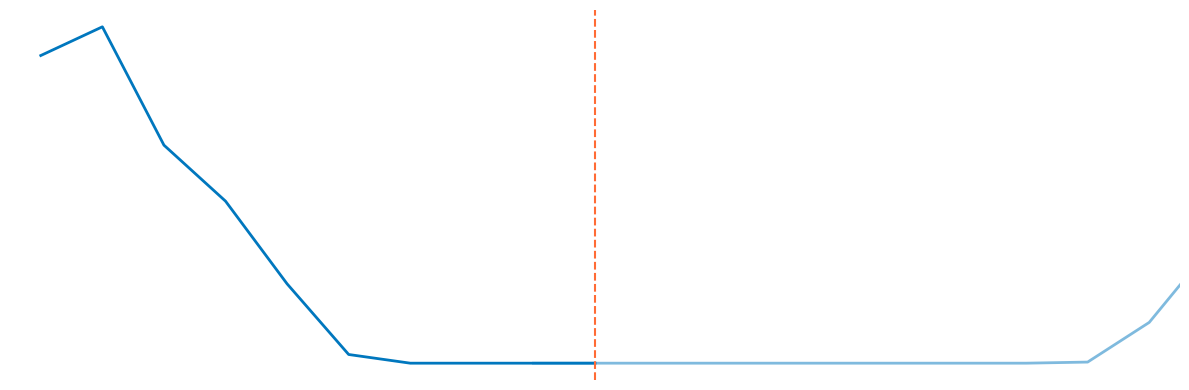

In [8]:

fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)


# Plotting the data with a beautiful shade of blue
ax.plot(together.loc[:now].index, together.loc[:now].Production, color=COLORS[0], lw=2, label='Production')

diff = together.copy()
last = together.loc[:now].index[-1]
together.loc[last, 'Predicted Consumption'] = together.loc[last, "Consumption"]

minus_last_hour = now - datetime.timedelta(hours= 1)

# Assuming you're faking the "Predicted Production" to be the same as "Production" just for visualization
together['Predicted Production'] = together.Production

# Plotting the predicted production after 'now' with a dashed line and reduced opacity
ax.plot(together.loc[minus_last_hour:].index, together.loc[minus_last_hour:]['Predicted Production'], 
 color=COLORS[0], 
        lw=2, 
        label='Pred',
        alpha = 0.5)




# Y-axis label
ax.set_ylabel("Eigen Produktion (W)",  labelpad=15,  fontsize = 13)

# Setting up the x-axis with a better formatting and rotating labels for clarity
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Add a dotted vertical line at 'now'
ax.axvline(x=now, linestyle='--', color=COLORS[3], lw=1.5)

# Centering the plot around now
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])


# Spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)


plt.tight_layout()

plt.savefig("imgs/Produktionsentwicklung_zoom.svg", bbox_inches = "tight")
plt.show()

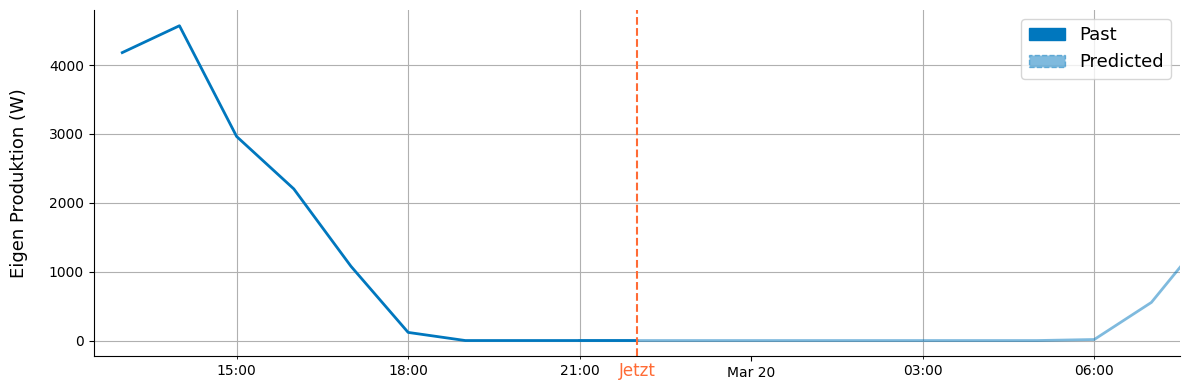

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))

now = datetime.datetime(2022, 3, 19, 22, 00)


# Plotting the data with a beautiful shade of blue
ax.plot(together.loc[:now].index, together.loc[:now].Production, color=COLORS[0], lw=2, label='Production')

diff = together.copy()
last = together.loc[:now].index[-1]
together.loc[last, 'Predicted Consumption'] = together.loc[last, "Consumption"]

minus_last_hour = now - datetime.timedelta(hours= 1)

# Assuming you're faking the "Predicted Production" to be the same as "Production" just for visualization
together['Predicted Production'] = together.Production

# Plotting the predicted production after 'now' with a dashed line and reduced opacity
ax.plot(together.loc[minus_last_hour:].index, together.loc[minus_last_hour:]['Predicted Production'], 
 color=COLORS[0], 
        lw=2, 
        label='Pred',
        alpha = 0.5)




# Y-axis label
ax.set_ylabel("Eigen Produktion (W)",  labelpad=15,  fontsize = 13)

# Setting up the x-axis with a better formatting and rotating labels for clarity
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax.xaxis.set_minor_locator(mdates.HourLocator(byhour=range(0, 24, 3)))
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
plt.setp(ax.xaxis.get_minorticklabels(), rotation=0)
ax.xaxis.grid(True, which="minor")
ax.yaxis.grid()

# Add a dotted vertical line at 'now'
ax.axvline(x=now, linestyle='--', color=COLORS[3], lw=1.5)
ax.text(now, -0.042, 'Jetzt', color=COLORS[3], ha='center', va='center', rotation=0, fontsize=12, transform=ax.get_xaxis_transform())

# Centering the plot around now
time_range = together.index[-1] - together.index[0]
half_range = time_range / 2
ax.set_xlim([now - half_range, now + half_range])

# Updated legend to include the Production and Predicted Production entries
legend_elements = [
                   Patch(facecolor=COLORS[0], edgecolor=COLORS[0], label='Past'),
                   Patch(facecolor=COLORS[0], edgecolor=COLORS[0], linestyle='--', alpha=0.5, label='Predicted')]
ax.legend(handles=legend_elements, loc='upper right', fontsize = 13)

# Spines (the box around the plot)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig("imgs/Produktionsentwicklung.svg", bbox_inches = "tight")
plt.show()

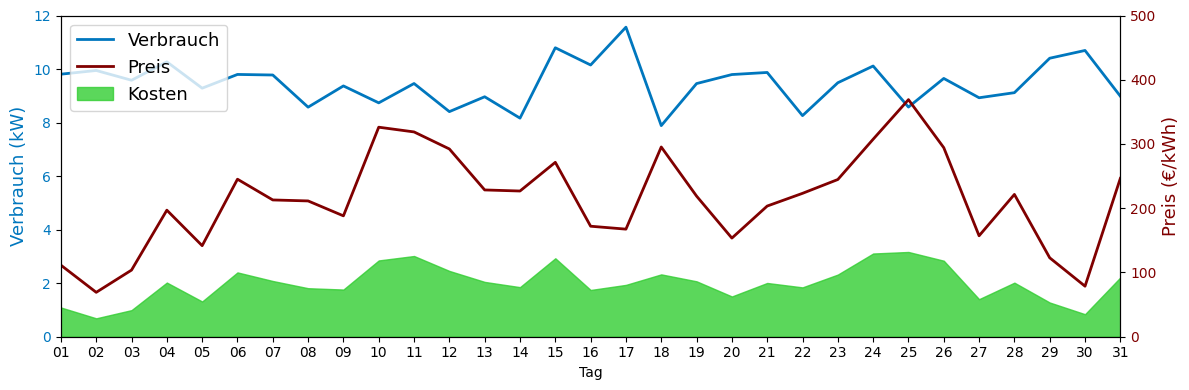

Consumption      293.8780
Costs          64093.8301
Preis           6620.2150
dtype: float64

In [10]:
mask = (df.index.year == 2022) & (df.index.month == 1)

wanted = df.loc[mask].copy()
wanted.Consumption /= 1000

Month = "February"

def get_costs_over_days(df):
    return df.groupby(df.index.date).agg(
        {"Consumption": "sum", "Costs": "sum", "Preis": "mean"}
    )
    

    
wanted = get_costs_over_days(wanted)

fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot Consumption
ax1.plot(wanted.index, wanted['Consumption'], color=COLORS[0], label='Consumption (kWh)', lw=2)
ax1.set_ylabel('Verbrauch (kW)', color=COLORS[0], fontsize = 13)
ax1.tick_params(axis='y', labelcolor=COLORS[0])

# Plot Avg Price on a second y-axis
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted['Preis'], color= COLORS[1], label='Avg Price (€/kWh)', lw=2)
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1], fontsize = 13)
ax2.tick_params(axis='y', labelcolor= COLORS[1])

ax2.set_ylim(0,500)
ax1.set_ylim(0,12)
# Fill the area between Consumption and Avg Price to represent costs
ax1.fill_between(wanted.index, wanted['Preis'] * wanted['Consumption'] / 1000,0, color=COLORS[2], alpha=0.8, label='Costs (area)')

# Setting up the x-axis
ax1.xaxis.set_major_locator(mdates.DayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax1.set_xlim(wanted.index.min(), wanted.index.max())  # Ensure it covers the entire month
ax1.set_xlabel('Tag')
# Title

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLORS[0], lw=2, label='Verbrauch'),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis'),
                   Patch(facecolor='#32CD32', edgecolor='#32CD32', alpha=0.8, label='Kosten')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize = 13)


plt.tight_layout()
plt.savefig("imgs/HistoryEntwicklung.svg", bbox_inches = "tight",)
plt.show()
wanted.sum()

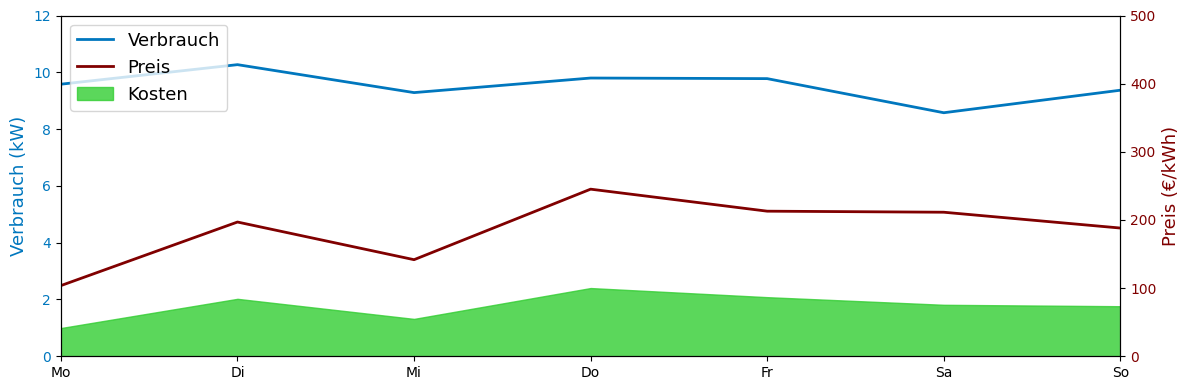

Consumption       66.655000
Costs          13129.474336
Preis           1300.019000
dtype: float64

In [11]:
mask = (df.index.year == 2022) & (df.index.month == 1)

wanted = df.loc[mask].copy()



wanted.Consumption /= 1000


def get_costs_over_days(df):
    return df.groupby(df.index.date).agg(
        {"Consumption": "sum", "Costs": "sum", "Preis": "mean"}
    )
    

    
wanted = get_costs_over_days(wanted)
wanted.index = pd.DatetimeIndex(wanted.index)
wanted = wanted.iloc[2:9]

fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot Consumption
ax1.plot(wanted.index, wanted['Consumption'], color=COLORS[0], label='Consumption (kWh)', lw=2)
ax1.set_ylabel('Verbrauch (kW)', color=COLORS[0], fontsize = 13)
ax1.tick_params(axis='y', labelcolor=COLORS[0])

# Plot Avg Price on a second y-axis
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted['Preis'], color= COLORS[1], label='Avg Price (€/kWh)', lw=2)
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1], fontsize = 13)
ax2.tick_params(axis='y', labelcolor= COLORS[1])

ax2.set_ylim(0,500)
ax1.set_ylim(0,12)
# Fill the area between Consumption and Avg Price to represent costs
ax1.fill_between(wanted.index, wanted['Preis'] * wanted['Consumption'] / 1000,0, color=COLORS[2], alpha=0.8, label='Costs (area)')

# Setting up the x-axis
# Setting up the x-axis
ax1.set_xticks(wanted.index)
ax1.set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%a'))


ax1.set_xlim(wanted.index.min(), wanted.index.max())  # Ensure it covers the entire month
# Title

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLORS[0], lw=2, label='Verbrauch'),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis'),
                   Patch(facecolor='#32CD32', edgecolor='#32CD32', alpha=0.8, label='Kosten')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize = 13)


plt.tight_layout()
plt.savefig("imgs/WochenEntwicklung.svg", bbox_inches = "tight")
plt.show()
wanted.sum()

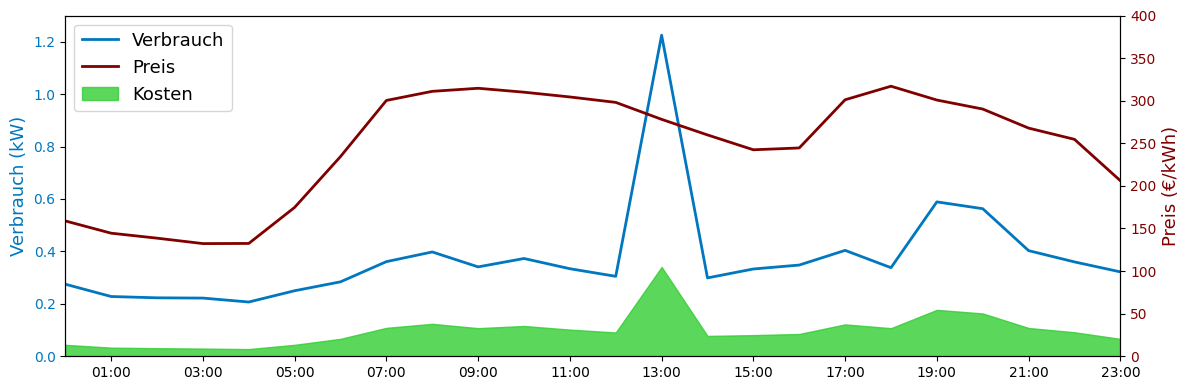

Production                                                    3786.0
Purchased                                                     7086.0
FeedIn                                                        1887.0
Consumption                                                    8.985
SelfConsumption                                               1899.0
Pred                                                             0.0
data               NormalNormalNormalNormalNormalNormalNormalNorm...
Preis                                                       5916.552
Costs                                                    2341.669512
Predicted Costs                                                  0.0
dtype: object

In [12]:
mask = df.index.date == datetime.date(2022, 1, 31)

wanted = df.loc[mask].copy()
wanted.Consumption /= 1000


last = wanted.index[-1]




fig, ax1 = plt.subplots(figsize=(12, 4))

# Plot Consumption
ax1.plot(wanted.index, wanted['Consumption'], color=COLORS[0], label='Consumption (kWh)', lw=2)
ax1.set_ylabel('Verbrauch (kW)', color=COLORS[0], fontsize = 13)
ax1.tick_params(axis='y', labelcolor=COLORS[0])

# Plot Avg Price on a second y-axis
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted['Preis'], color= COLORS[1], label='Avg Price (€/kWh)', lw=2)
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1], fontsize = 13)
ax2.tick_params(axis='y', labelcolor= COLORS[1])

ax2.set_ylim(0,400)
ax1.set_ylim(0,1.3)
# Fill the area between Consumption and Avg Price to represent costs
ax1.fill_between(wanted.index, wanted['Preis'] * wanted['Consumption'] / 1000,0, color=COLORS[2], alpha=0.8, label='Costs (area)')

# Setting up the x-axis
# Setting up the x-axis
# ax1.set_xticks(wanted.index)
# ax1.set_xticklabels(['Mo', 'Di', 'Mi', 'Do', 'Fr', 'Sa', 'So'])
# # ax1.xaxis.set_major_formatter(mdates.DateFormatter('%a'))


ax1.set_xlim(wanted.index.min(), wanted.index.max())  # Ensure it covers the entire month
# Title

from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], color=COLORS[0], lw=2, label='Verbrauch'),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis'),
                   Patch(facecolor='#32CD32', edgecolor='#32CD32', alpha=0.8, label='Kosten')]
ax1.legend(handles=legend_elements, loc='upper left', fontsize = 13)
# Setting up the x-axis with hourly ticks
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))


plt.tight_layout()
plt.savefig("imgs/TagesEntwicklung.svg", bbox_inches = "tight")
plt.show()
wanted.sum()

In [20]:
wanted = after.loc[after.index.date == datetime.date(2022, 3, 20)].copy()

morfed = wanted["Pred"].copy()

morfed[8 -1] += 100
morfed[9-1:12-1] += 200

morfed[13-1] -= 100
morfed[14-1] -= 100

morfed[19-2:24-2] -= 100


wanted["Optimale Nutzung"] = morfed

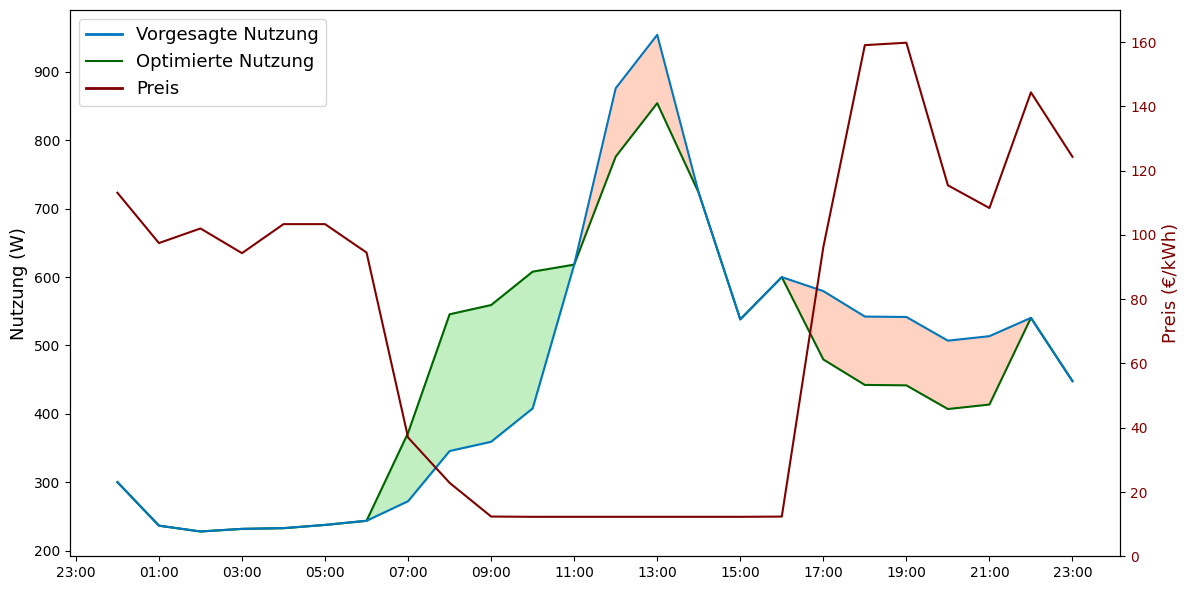

In [21]:


fig, ax1 = plt.subplots(figsize=(12, 6))

# "Vorgesagte Nutzung" auf der primären Y-Achse
ax1.plot(wanted.index, wanted["Optimale Nutzung"], label="Optimierte Nutzung", color=COLORS[-1])
ax1.plot(wanted.index, wanted["Pred"], label="Vorgesagte Nutzung", color=COLORS[0])
ax1.set_ylabel('Nutzung (W)', fontsize = 13)
ax1.tick_params(axis='y')

# Preis auf der sekundären Y-Achse
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted["Preis"], label="Preis (€/kWh)", color=COLORS[1])
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1], fontsize = 13)
ax2.tick_params(axis='y', labelcolor= COLORS[1])

start_time = datetime.datetime(wanted.index[0].year, wanted.index[0].month, wanted.index[0].day, 11, 0)
end_time = datetime.datetime(wanted.index[0].year, wanted.index[0].month, wanted.index[0].day, 22, 0)

ax1.fill_between(wanted.index, wanted["Optimale Nutzung"], wanted["Pred"],
                 where=((wanted.index >= start_time) & (wanted.index <= end_time) & (wanted["Optimale Nutzung"] < wanted["Pred"])),
                 color= COLORS[3], alpha=0.3, interpolate= True)



start_time_green = wanted.index[0]
end_time_green = datetime.datetime(start_time_green.year, start_time_green.month, start_time_green.day, 11, 0)

ax1.fill_between(wanted.index, wanted["Optimale Nutzung"], wanted["Pred"],
                 where=((wanted.index >= start_time_green) & (wanted.index <= end_time_green) & (wanted["Optimale Nutzung"] >= wanted["Pred"])),
                 color=COLORS[2], alpha=0.3, interpolate=True)


# Titel und Legende hinzufügen
ax2.set_ylim(0, 170)

ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

from matplotlib.lines import Line2D
legend_elements = [
                    Line2D([0], [0], color=COLORS[0], lw=2, label="Vorgesagte Nutzung",),
                   Line2D([0],[0], color=COLORS[-1], label="Optimierte Nutzung",),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis',),
                   ]
ax1.legend(handles=legend_elements, loc='upper left', fontsize = 13)

plt.tight_layout()
plt.savefig("imgs/sparplan.svg")
plt.show()

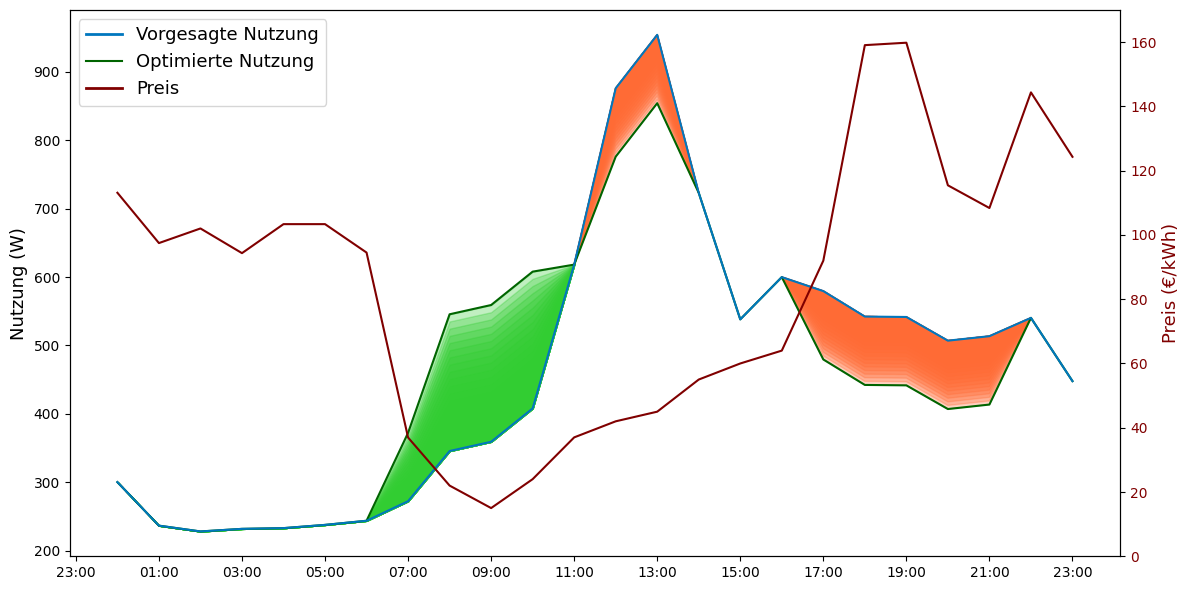

In [34]:
wanted = after.loc[after.index.date == datetime.date(2022, 3, 20)].copy()

morfed = wanted["Pred"].copy()

morfed[8 -1] += 100
morfed[9-1:12-1] += 200

morfed[13-1] -= 100
morfed[14-1] -= 100

morfed[19-2:24-2] -= 100


wanted["Optimale Nutzung"] = morfed

val = wanted.Preis.values
val[8:18] = [22, 15, 24,37, 42, 45, 55, 60, 64, 92]

steps = 20

diff = np.linspace(0,1, steps)

diff = (morfed - wanted.Pred.values).values[None, :] * diff[:,None] + wanted.Pred.values[None, :]
diff


fig, ax1 = plt.subplots(figsize=(12, 6))

# "Vorgesagte Nutzung" auf der primären Y-Achse
line1, = ax1.plot(wanted.index, wanted["Optimale Nutzung"], label="Optimierte Nutzung", color=COLORS[-1])
line2, = ax1.plot(wanted.index, wanted["Pred"], label="Vorgesagte Nutzung", color=COLORS[0])
ax1.set_ylabel('Nutzung (W)', fontsize = 13)
ax1.tick_params(axis='y')

# Preis auf der sekundären Y-Achse
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted["Preis"], label="Preis (€/kWh)", color=COLORS[1])
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1], fontsize = 13)
ax2.tick_params(axis='y', labelcolor= COLORS[1])

start_time = datetime.datetime(wanted.index[0].year, wanted.index[0].month, wanted.index[0].day, 11, 0)
end_time = datetime.datetime(wanted.index[0].year, wanted.index[0].month, wanted.index[0].day, 22, 0)



start_time_green = wanted.index[0]
end_time_green = datetime.datetime(start_time_green.year, start_time_green.month, start_time_green.day, 11, 0)




# Titel und Legende hinzufügen
ax2.set_ylim(0, 170)

ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

from matplotlib.lines import Line2D
legend_elements = [
                    Line2D([0], [0], color=COLORS[0], lw=2, label="Vorgesagte Nutzung",),
                   Line2D([0],[0], color=COLORS[-1], label="Optimierte Nutzung",),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis',),
                   ]
ax1.legend(handles=legend_elements, loc='upper left', fontsize = 13)



def update(frame):
    ydata = diff[frame]
    line1.set_ydata(ydata)
    
    
    ax1.fill_between(wanted.index, ydata, wanted["Pred"],
                     where=((wanted.index >= start_time) & (wanted.index <= end_time) & (ydata < wanted["Pred"])),
                     color=COLORS[3], alpha=0.3, interpolate=True)
    
    ax1.fill_between(wanted.index, ydata, wanted["Pred"],
                     where=((wanted.index >= start_time_green) & (wanted.index <= end_time_green) & (ydata >= wanted["Pred"])),
                     color=COLORS[2], alpha=0.3, interpolate=True)
    
    return line1, line2

plt.tight_layout()
ani = FuncAnimation(fig, update, frames=range(steps), blit=True, repeat=False)
ani.save("imgs/animation.gif")


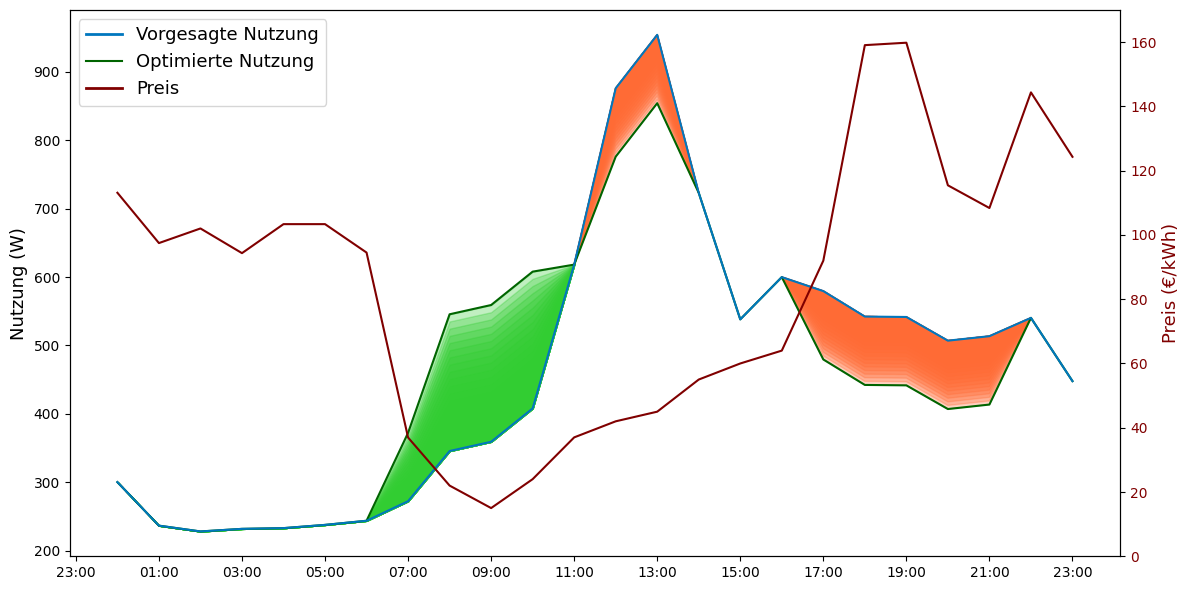

In [40]:
wanted = after.loc[after.index.date == datetime.date(2022, 3, 20)].copy()

morfed = wanted["Pred"].copy()

morfed[8 -1] += 100
morfed[9-1:12-1] += 200

morfed[13-1] -= 100
morfed[14-1] -= 100

morfed[19-2:24-2] -= 100


wanted["Optimale Nutzung"] = morfed

val = wanted.Preis.values
val[8:18] = [22, 15, 24,37, 42, 45, 55, 60, 64, 92]

steps = 20

diff = np.linspace(0,1, steps)

diff = (morfed - wanted.Pred.values).values[None, :] * diff[:,None] + wanted.Pred.values[None, :]
diff


fig, ax1 = plt.subplots(figsize=(12, 6))

# "Vorgesagte Nutzung" auf der primären Y-Achse
line1, = ax1.plot(wanted.index, wanted["Optimale Nutzung"], label="Optimierte Nutzung", color=COLORS[-1])
line2, = ax1.plot(wanted.index, wanted["Pred"], label="Vorgesagte Nutzung", color=COLORS[0])
ax1.set_ylabel('Nutzung (W)', fontsize = 13)
ax1.tick_params(axis='y')

# Preis auf der sekundären Y-Achse
ax2 = ax1.twinx()
ax2.plot(wanted.index, wanted["Preis"], label="Preis (€/kWh)", color=COLORS[1])
ax2.set_ylabel('Preis (€/kWh)', color= COLORS[1], fontsize = 13)
ax2.tick_params(axis='y', labelcolor= COLORS[1])

start_time = datetime.datetime(wanted.index[0].year, wanted.index[0].month, wanted.index[0].day, 11, 0)
end_time = datetime.datetime(wanted.index[0].year, wanted.index[0].month, wanted.index[0].day, 22, 0)



start_time_green = wanted.index[0]
end_time_green = datetime.datetime(start_time_green.year, start_time_green.month, start_time_green.day, 11, 0)




# Titel und Legende hinzufügen
ax2.set_ylim(0, 170)

ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

from matplotlib.lines import Line2D
legend_elements = [
                    Line2D([0], [0], color=COLORS[0], lw=2, label="Vorgesagte Nutzung",),
                   Line2D([0],[0], color=COLORS[-1], label="Optimierte Nutzung",),
                   Line2D([0], [0], color=COLORS[1], lw=2, label='Preis',),
                   ]
ax1.legend(handles=legend_elements, loc='upper left', fontsize = 13)



def update(frame):
    ydata = diff[frame]
    line1.set_ydata(ydata)
    
    
    ax1.fill_between(wanted.index, ydata, wanted["Pred"],
                     where=((wanted.index >= start_time) & (wanted.index <= end_time) & (ydata < wanted["Pred"])),
                     color=COLORS[3], alpha=0.3, interpolate=True)
    
    ax1.fill_between(wanted.index, ydata, wanted["Pred"],
                     where=((wanted.index >= start_time_green) & (wanted.index <= end_time_green) & (ydata >= wanted["Pred"])),
                     color=COLORS[2], alpha=0.3, interpolate=True)
    
    return line1, line2

plt.tight_layout()
ani = FuncAnimation(fig, update, frames=range(steps), blit=True, repeat=False)

ani.save("imgs/animation.mp4", fps= 4)